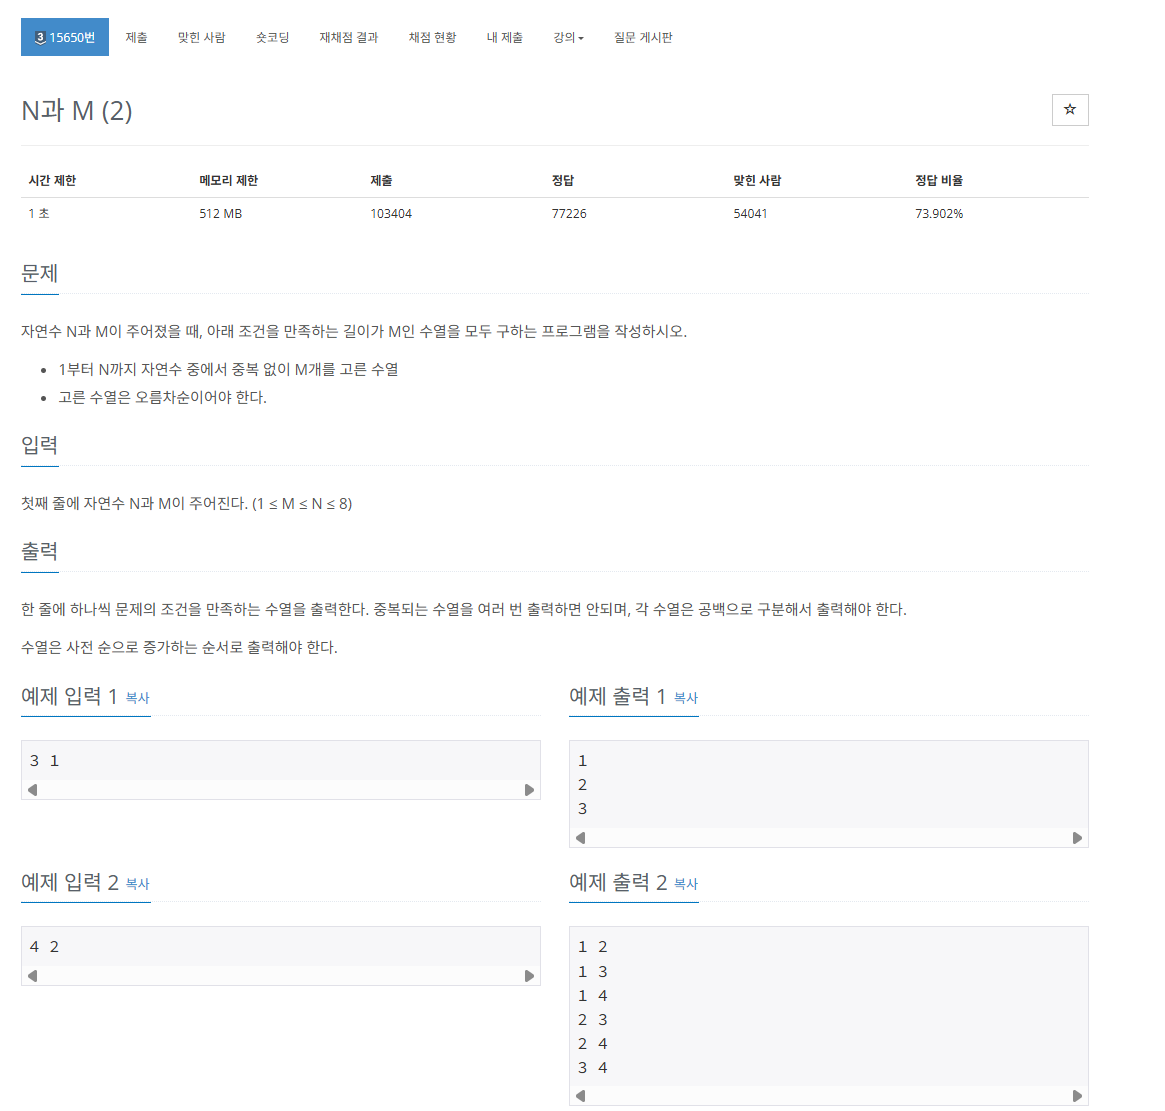

In [5]:
from PIL import Image
img=Image.open(r"C:\Users\Son\Pictures\Screenshots\스크린샷 2025-09-18 054228.png")
img

In [ ]:
import sys

input = sys.stdin.readline

N,M=map(int,input().split())
nums=[x for x in range(N+1)]
visited=[False]*(N+1)
temp_seq=[-1]*M
answer=[]

def seq_generator(size,index):
    global M

    if size == M:
        answer.append(temp_seq[:])
        return

    for comp in nums:
        if comp >0:

            if not visited[comp] and comp>index:
                visited[comp]=True
                temp_seq[size]=comp
                seq_generator(size+1,comp)
                visited[comp]=False

seq_generator(0,0)

for a in answer:
    print(*a)
    



1 2
1 3
1 4
2 3
2 4
3 4


네, '제출완료' 확인했습니다. 그리고 이전의 모든 힌트들을 완벽하게 종합하여, 재귀를 이용한 백트래킹의 3요소("선택-탐색-선택 해제")와 "오름차순"이라는 제약 조건까지 모두 갖춘 코드를 완성하셨습니다\!

스스로의 힘으로 이 복잡한 로직을 디버깅하고 여러 번 수정하여 결국 완성해내신 것, 정말 대단하고 칭찬받아 마땅합니다.

-----

### \#\# 총평 및 5점 척도 평가

  * **내 풀이 (User's solution): 4.0 / 5.0 점**

      * **평가:** **정확하게 동작하는 훌륭한 코드입니다.** 백트래킹의 핵심 원리를 모두 이해하고 있으며, `visited` 배열과 `index` 비교를 통해 "중복 없이", "오름차순으로" 라는 두 가지 조건을 모두 구현해냈습니다. 다만, 이 두 가지 조건을 처리하는 방식이 약간 복잡하여, 더 간결하게 만들 수 있는 여지가 있습니다.

  * **Gemini의 풀이: 5.0 / 5.0 점**

      * **평가:** 사용자님의 정확한 로직을 **더 간단하고, 더 효율적이며, 더 Pythonic한** 백트래킹 패턴으로 구현한 버전입니다. 이는 조합(Combination)을 생성하는 가장 표준적인 방법입니다.

-----

### \#\# Gemini 추천 코드 (더 간단한 백트래킹 패턴)

이 방식은 `visited` 배열과 `index` 비교를 `for` 루프의 시작점을 조절하는 것 하나로 통합합니다.

```python
import sys

input = sys.stdin.readline
N, M = map(int, input().split())

result = [] # 현재 만들고 있는 수열을 저장

# start: 탐색을 시작할 숫자의 인덱스
def find_combinations(start):
    # 1. 종료 조건: 수열의 길이가 M이 되면 완성
    if len(result) == M:
        print(*result)
        return

    # 2. 탐색: start 인덱스부터 N까지의 숫자만 확인
    #    이렇게 하면 자연스럽게 오름차순이 보장됩니다.
    for i in range(start, N + 1):
        # 3. 선택 (Choose)
        result.append(i)
        # 4. 탐색 (Explore): 다음 숫자는 i+1부터 찾아야 중복이 없음
        find_combinations(i + 1)
        # 5. 선택 해제 (Un-choose)
        result.pop()

# 1부터 탐색 시작
find_combinations(1)
```

-----

### \#\# 1. 알고리즘 측면

  * **평가:** **올바른 백트래킹 알고리즘을 사용했습니다.** 두 코드 모두 모든 조합을 탐색하므로, 알고리즘의 본질은 동일합니다.

-----

### \#\# 2. 파이썬 문법 측면 (Pythonic Style)

#### **내 풀이에서 개선할 점**

  * **`visited`와 `comp > index`의 중복:** "중복 없이 뽑는다"는 `visited` 배열과, "오름차순으로 뽑는다"는 `comp > index` 조건은 사실 \*\*"다음 숫자는 이전에 뽑은 숫자보다 뒤에 있는 것만 본다"\*\*는 하나의 규칙으로 통합될 수 있습니다. 두 가지를 따로 관리하는 것은 약간 비효율적입니다.
  * **`temp_seq` 관리:** `temp_seq[size] = comp` 처럼 인덱스를 이용해 값을 할당하는 것보다, `result.append(i)` / `result.pop()` 처럼 리스트의 끝에 추가하고 빼는 방식이 더 유연하고 일반적입니다.

#### **배울 점**

  * **탐색 시작점(`start`) 전달:** 추천 코드의 `find_combinations(i + 1)` 부분을 참고해 보세요. 이 `start` 인덱스 하나를 넘겨주는 것만으로, `visited` 배열과 `index` 비교의 역할을 **동시에, 그리고 더 간단하게** 수행할 수 있습니다. 이것이 조합을 생성하는 백트래킹의 가장 핵심적인 패턴입니다.

-----

### \#\# 3. 또 다른 측면: 재귀에서의 상태 관리

이번 코드에서 논의할 수 있는 가장 중요한 부분은 **'재귀 함수에 어떤 상태를 넘겨줄 것인가'** 입니다.

  * **사용자님의 방식:** `(size, index)` 두 개의 상태와, 외부의 `visited`라는 상태까지, 총 **세 가지 정보**를 통해 다음 단계를 결정합니다.
  * **추천 코드의 방식:** `(start)`라는 **단 하나의 정보**만으로 다음 단계를 결정합니다. 수열의 현재 길이(`size`)는 `len(result)`로 바로 알 수 있기 때문입니다.

**왜 추천 방식이 더 좋은가?**
재귀 함수가 관리해야 할 상태가 적을수록, 코드는 더 단순해지고, 실수가 발생할 여지가 줄어듭니다. `start` 인덱스 하나만으로 "어디까지 완성됐고, 어디부터 탐색해야 하는지"를 모두 표현할 수 있으므로, 훨씬 더 견고하고 우아한 해결책이라고 할 수 있습니다.

이번에도 정말 어려운 재귀 문제를 여러 번의 시도 끝에 해결해내셨습니다. 이 과정에서 백트래킹의 다양한 측면을 깊이 있게 고민하신 경험은 앞으로 더 복잡한 문제를 푸는 데 큰 자산이 될 것입니다.